### Introduction

<div style="text-align: justify">
Wondering if that Philosophy major will really help you pay the bills? Think you're set with an Engineering degree? Choosing a college major is a complex decision evaluating personal interest, difficulty, and career prospects. Your first paycheck right out of college might say a lot about your salary potential by mid-career. Whether you're in school or navigating the postgrad world, join me as we explore the short and long term financial implications of this major decision.
</div><br><div style="text-align: justify">
In this notebook, we'll be using data collected from a year-long survey of 1.2 million people with only a bachelor's degree by PayScale Inc., made available here by the Wall Street Journal for their article Ivy League's Big Edge: Starting Pay. After doing some data clean up, we'll determine the optimal number of clusters, apply a k-means clustering analysis, and visualize the results.</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Importing Dataset
*   The dataset used in this project is made available here by The Wall Street Journal
*   Further analysis can be done with information about type of college and major region in the US.

In [2]:
# Loading our dataset
df = pd.read_csv('degrees-that-pay-back.csv')
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


### Data cleaning

*   As soon as we look at the top rows of the dataset and the types of the columns, we find incorrect column types

In [3]:
# All the columns representing money were loaded as object ($10,000.00)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     object 
 2   Mid-Career Median Salary                           50 non-null     object 
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     object 
 5   Mid-Career 25th Percentile Salary                  50 non-null     object 
 6   Mid-Career 75th Percentile Salary                  50 non-null     object 
 7   Mid-Career 90th Percentile Salary                  50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [4]:
# Converting currency values $10,000.00 to float values 10000.00
for i in df.columns:
  if i not in ['Undergraduate Major', 'Percent change from Starting to Mid-Career Salary']:
    df[i] = df[i].apply(lambda x: x.replace(',', '').replace('$', '')).astype('float')

In [5]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


### Exploratory Data Analysis (EDA)

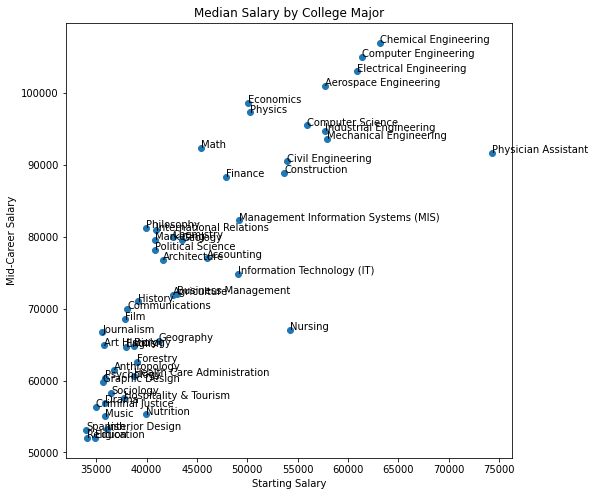

In [6]:
# Plotting the data for the first time
plt.figure(figsize=(8, 8))
plt.scatter(df['Starting Median Salary'], df['Mid-Career Median Salary'])
plt.title('Median Salary by College Major')
plt.xlabel('Starting Salary')
plt.ylabel('Mid-Career Salary')
for i, label in enumerate(df['Undergraduate Major']):
    plt.annotate(label, (df['Starting Median Salary'].iloc[i], df['Mid-Career Median Salary'].iloc[i]))

*   We can almost surely suggest a linear correlation between median starting salary and median mid-career salary.

### ML Techniques

<div style="text-align: justify">
The elbow method is a technique to determine how many clusters we should be modeling. It plots the intracluster variance against the number of clusters. The "elbow" bend of the curve indicates the optimal point at which adding more clusters will no longer explain a significant amount of the variance.
</div>

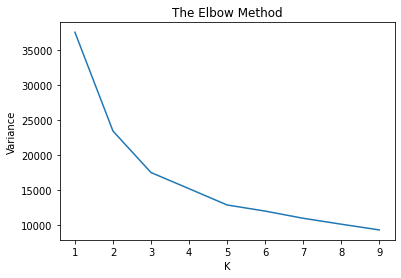

In [7]:
# First we apply dimensionality reducion to our multi-columns dataset
pca = PCA(n_components = 2)
X   = pca.fit_transform(df[df.columns[1:]])

# Calculating k-means for n values of k
wss = []
for k in range(1, 10):
  model = KMeans(n_clusters=k).fit(X)
  model.fit(X)
  wss.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])

# Plot the results
plt.plot(range(1, 10), wss)
plt.xlabel('K')
plt.ylabel('Variance')
plt.title('The Elbow Method')
plt.show()

*   Then, I apply the k-means clustering algorithm using our previously found optimal number of clusters.






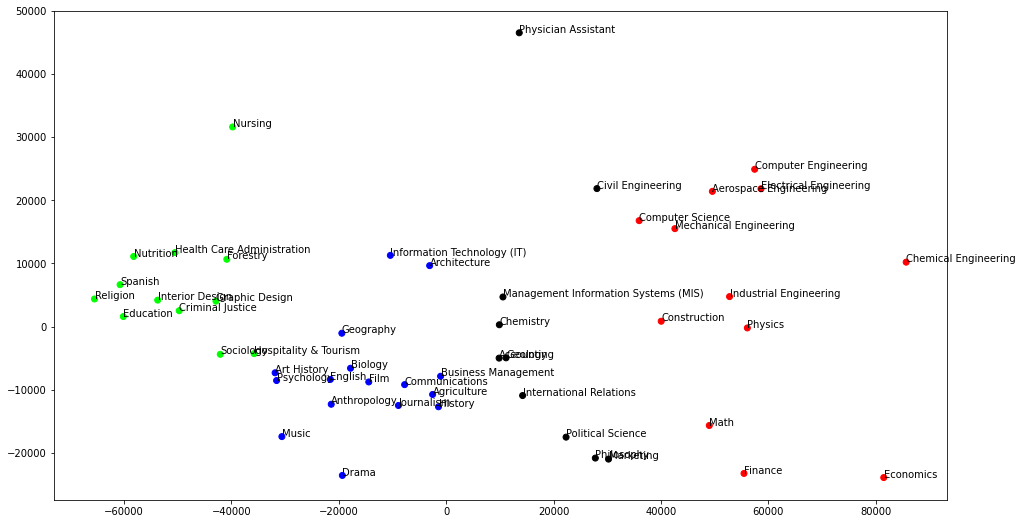

In [8]:
# Running k-means with the optimal number
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)

df['class'] = kmeans.labels_

colormap = np.array(['red', 'lime', 'black', 'blue'])

# Plotting the clusters
plt.figure(figsize = (16,9))
plt.scatter(X[:,0], X[:,1], c = colormap[kmeans.labels_])
for i, txt in enumerate(df.iloc[:,0]):
    plt.annotate(txt, (X[i,0], X[i,1]))
plt.show()

## Results

### The Engineers

<div style="text-align: justify">
Year after year, science, technology, engineering, and math jobs in general are paid the highest average starting salary in the US. Their high earnings are commensurate with the required technical skills to complete the course, which are extremely <a href="https://https://www.thomasnet.com/insights/why-engineers-earn-more/">high in demand</a>.
</div>
<br>
<div style="text-align: justify">
Among the billionares, economics and engineering are the second and third most popular degrees, according to <a href="https://https://www.forbes.com/sites/mattdurot/2021/10/08/want-to-be-a-billionaire-these-are-the-most-popular-majors-of-the-richest-americans/">Forbes</a>.
</div>

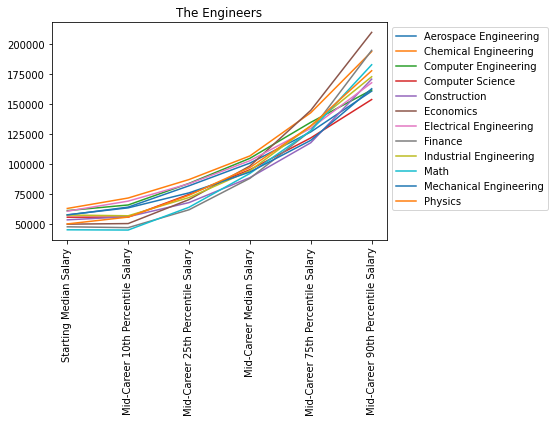

In [9]:
# First we drop useless information for this chart, second we rearrange the columns in ascending order
cluster = df[df['class'] == 0].set_index('Undergraduate Major').drop(['Percent change from Starting to Mid-Career Salary', 'class'], axis = 1)
cluster = cluster.iloc[:, [0] + [2, 3] + [1] + [4, 5]].T

for i in cluster.columns:
    plt.plot(cluster[i])

plt.title('The Engineers')
plt.legend(cluster.columns, bbox_to_anchor = (1, 1))
plt.xticks(rotation = 90)
plt.show()

### The Average Earners

<div style="text-align: justify">
Degrees that range from chemistry to international relations can grant a person the <a href="https://www.shrm.org/resourcesandtools/hr-topics/compensation/pages/salaries-for-college-graduates-climb-amid-labor-shortages.aspx">average starting salary</a> of $55,000 for a college graduate. Majors such as civil engineering and physician assistant outstand the majority.

</div>

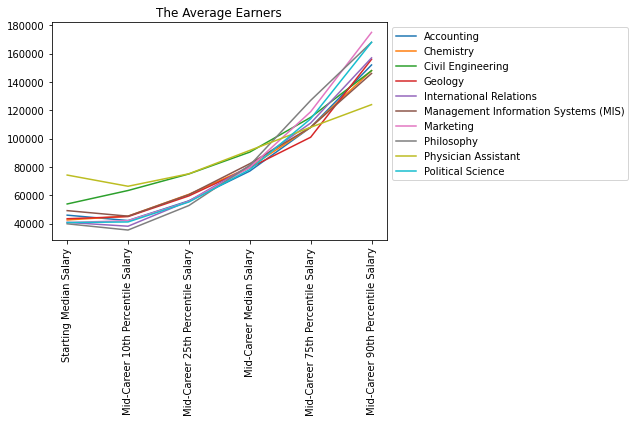

In [10]:
# First we drop useless information for this chart, second we rearrange the columns in ascending order
cluster = df[df['class'] == 2].set_index('Undergraduate Major').drop(['Percent change from Starting to Mid-Career Salary', 'class'], axis = 1)
cluster = cluster.iloc[:, [0] + [2, 3] + [1] + [4, 5]].T

for i in cluster.columns:
    plt.plot(cluster[i])

plt.title('The Average Earners')
plt.legend(cluster.columns, bbox_to_anchor = (1, 1))
plt.xticks(rotation = 90)
plt.show()

### The Humanities + Common Choices

<div style="text-align: justify">
Degrees such as biology, business, and history are the <a href="https://www.bestcolleges.com/blog/most-popular-college-majors/">most common choices</a> in the US.
</div>
<br>
<div style="text-align: justify">
The many Liberal Arts majors in this cluster may represent the lowest percentiles with limited growth opportunity, but there is hope for those who make it! Music is our riskiest major with the lowest 10th percentile salary, but Drama wins the highest growth potential in the 90th percentile for this cluster
</div>

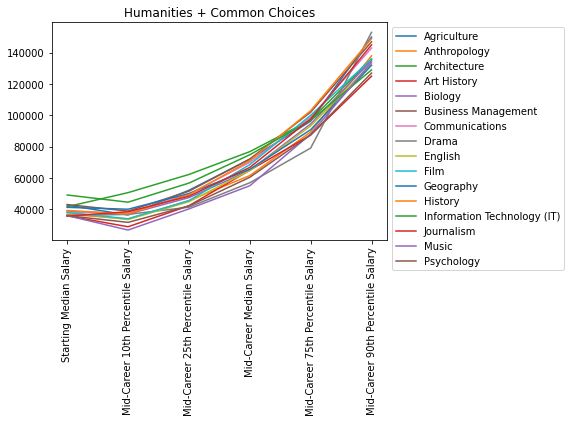

In [11]:
# First we drop useless information for this chart, second we rearrange the columns in ascending order
cluster = df[df['class'] == 3].set_index('Undergraduate Major').drop(['Percent change from Starting to Mid-Career Salary', 'class'], axis = 1)
cluster = cluster.iloc[:, [0] + [2, 3] + [1] + [4, 5]].T

for i in cluster.columns:
    plt.plot(cluster[i])

plt.title('The Humanities')
plt.legend(cluster.columns, bbox_to_anchor = (1, 1))
plt.xticks(rotation = 90)
plt.show()

### The Lower End
<div style="text-align: justify">
It is noteworthy that salary is not a single variable equation and your college major does not determine your income. Nursing is the outlier culprit of cluster number 1, with a higher safety net in the lowest percentile to the median.
</div>

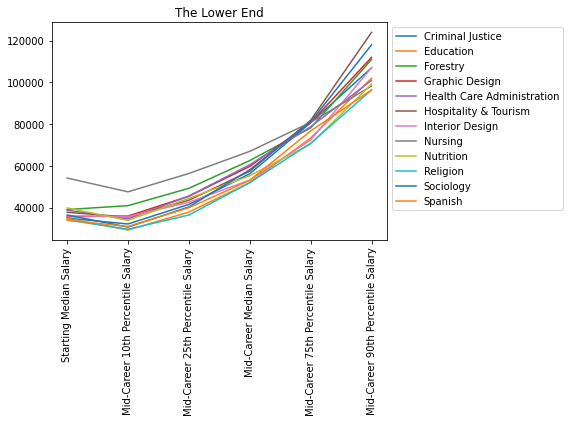

In [14]:
# First we drop useless information for this chart, second we rearrange the columns in ascending order
cluster = df[df['class'] == 1].set_index('Undergraduate Major').drop(['Percent change from Starting to Mid-Career Salary', 'class'], axis = 1)
cluster = cluster.iloc[:, [0] + [2, 3] + [1] + [4, 5]].T

for i in cluster.columns:
    plt.plot(cluster[i])

plt.title('The Lower End')
plt.legend(cluster.columns, bbox_to_anchor = (1, 1))
plt.xticks(rotation = 90)
plt.show()

### Summary

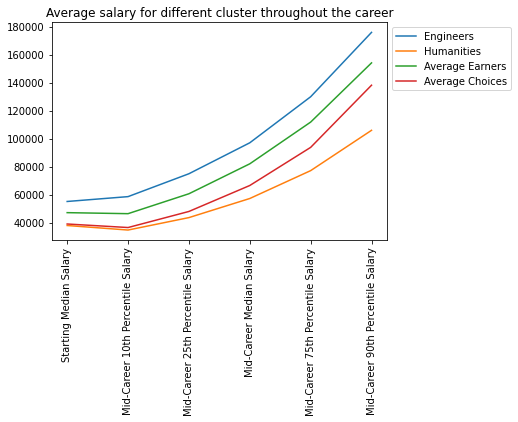

In [13]:
mean = df.groupby('class').mean().drop('Percent change from Starting to Mid-Career Salary', axis = 1)
mean = mean.iloc[:, [0] + [2, 3] + [1] + [4, 5]].T

for i in mean.columns:
    plt.plot(mean[i])

plt.legend(['Engineers', 'Humanities', 'Average Earners', 'Average Choices'], bbox_to_anchor = (1, 1))
plt.title('Average salary for different cluster throughout the career')
plt.xticks(rotation = 90)
plt.show()